<h3 align="center">Практическая работа №2. Применение однослойной нейронной сети для решения задач регрессии экспериментальных данных</h3>
<h3 align="center"> Выполнил: Ландызин А.Н. М092101(71)<h3>
### Цель работы

Цель работы — изучить возможности однослойных НС с правилом обучения Видроу — Хоффа в задачах регрессии экспериментальных данных.

### Постановка задачи.

Постановка задачи. В зависимости от варианта работы с помощью НС с линейной функцией активации аппроксимировать функцию $f(x)$ (найти коэффициенты $c, d$) по набору ее $N$ дискретных значений, заданных равномерно на интервале $[a, b]$ со случайными ошибками $e_i=A rnd(-0,5; 0,5)$. Выполнить расчет параметров $c, d$ методом наименьших квадратов (МНК) и определить среднеквадратичное отклонение (СКО). Провести обучение НС по правилу Видроу — Хоффа, экспериментальным путем подобрав оптимальный коэффициент обучения

## 6 вариант
Параметры:

$a = -2$

$b = 1$

$c = 0.5$

$d = 0$

$N = 20$

$F = c x^2 + d$

$A = 1$

In [ ]:
pip install matplotlib

In [ ]:
import numpy as np
from copy import copy
import matplotlib.pyplot as plt
import math
from dataclasses import dataclass
from typing import List, Iterable, TYPE_CHECKING, Callable, Optional
import types

Variants

In [ ]:
@dataclass
class Point:
    x: float
    y: float


def mnk(data: List[Iterable[List[float]]]) -> (float, float):
    """
    Возвращает значения c, d, расчитанные по методу наименьших квадратов
    Принимает в себя список точек
    """
    points = [Point(x, y) for x, y in data]
    n = len(points)
    c = (n * sum((point.x * point.y for point in points)) - sum((point.x for point in points)) * sum((point.y for point in points))) \
        / (n * (sum((math.pow(point.x, 2) for point in points))) - math.pow(sum((point.x for point in points)), 2))
    d = (sum((point.y for point in points)) - c * sum((point.x for point in points))) / n
    return c, d


def af(self: "NeuralNetwork", x: float) -> float:
    return x


def df(self: "NeuralNetwork", net: float) -> float:
    return 1.0


def just_x(self: "NeuralNetwork", x: int) -> float:
    return float(x)

services

In [ ]:
class NeuralNetwork:

    def __init__(self,
                 learning_rate: float,
                 activation_function: Callable[["NeuralNetwork", float], float],
                 error_function: Callable[["NeuralNetwork", int], float] = just_x,
                 c: float = 0.0,
                 d: float = 0.0):
        """
        Инициализируем веса
        Переданные функции активации и ее производная должны первым параметром принимать параметр self,
        чтобы превратить их в метод.
        """
        self.weights: List[float] = [c, d]  # c, d

        # параметр learning_rate должен иметь значение от 0 не включительно до 1 включительно
        if not 0.0 < learning_rate <= 1.0:
            raise ValueError('Поставьте параметр learning_rate от 0 до 1 (необходимо по сабжекту)')
        self.learning_rate: float = learning_rate
        self.activation_function = types.MethodType(activation_function, self)
        self.error_function = types.MethodType(error_function, self)

        self.current_nn_output: Optional[List[float]] = None

    def get_net(self, x: float) -> float:
        return self.weights[0] * x + self.weights[1]

    def _get_output_data(self,
                         input_data: List[float]) -> List[float]:
        return [self.activation_function(self.get_net(x)) for x in input_data]

    def change_weights(self,
                       input_train_data: List[float],
                       errors: List[float]) -> None:
        self.weights[0] += sum(self.learning_rate *
                               self.error_function(errors[j]) *
                               input_train_data[j]
                               for j in range(len(input_train_data)))
        self.weights[1] += sum(self.learning_rate *
                               self.error_function(errors[j])
                               for j in range(len(input_train_data)))

    def epoch(self,
              input_data: List[float],
              expected_output_data: List[float]) -> float:
        self.current_nn_output = self._get_output_data(input_data)
        errors = [expected_output_data[i] - self.current_nn_output[i] for i in range(len(self.current_nn_output))]
        self.change_weights([x for x in input_data], errors)
        return sum([x ** 2 for x in errors])

    def predict(self,
                input_data: List[float]) -> List[float]:
        return [self.c * x + self.d for x in input_data]

    @property
    def c(self):
        return self.weights[0]

    @property
    def d(self):
        return self.weights[1]


if __name__ == '__main__':
    data = []
    epochs = 10
    epoch_output = []
    a = -2
    b = 1
    c = 0.5
    d = 0
    N = 20
    A = 1

    x_points = np.random.uniform(low=a, high=b, size=N)
    rA = np.random.normal(scale=A, size=x_points.size)
    y_points = c * x_points ** 2 + d + rA
    _c, _d = mnk(list(zip([x ** 2 for x in x_points], y_points)))

    true_x = np.linspace(a, b)
    true_y = c * true_x ** 2 + d

    mnk_x = np.linspace(a, b)
    mnk_y = _c * mnk_x ** 2 + _d

    nn = NeuralNetwork(learning_rate=0.5, activation_function=af)

    for i in range(epochs):

        nn.epoch(input_data=[x ** 2 for x in x_points], expected_output_data=list(y_points))
        x = np.linspace(a, b, 100)
        y = c * x ** 2 + d

***
### 1. Решение задачи регрессии через МНК. Параметр шума отсутствует, ошибка нулевая

c =  0.5 d =  0.0


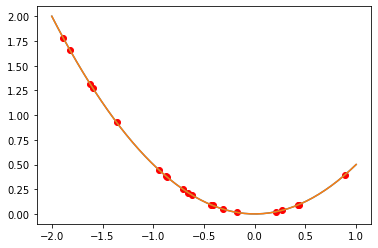

In [ ]:
a = -2
b = 1
c = 0.5
d = 0
N = 20

x_points = np.random.uniform(low=a, high=b, size=N)

y_points = c * x_points ** 2 + d

_c, _d = mnk(list(zip([x ** 2 for x in x_points], y_points)))

true_x = np.linspace(a, b)
true_y = c * true_x ** 2 + d

mnk_x = np.linspace(a, b)
mnk_y = _c * mnk_x ** 2 + _d

plt.plot(true_x, true_y)
plt.scatter(x_points, y_points, c='red')

plt.plot(mnk_x, mnk_y)
print("c = ", _c, "d = ", _d)


***
### 2. Решение задачи регрессии через обучение нейрона. Количество эпох - 100, норма обучения - 0,025. Параметр шума отсутствует

Среднеквадратичная ошибка: 3.164800063810069e-13
c = 0.49999980722584936 d = 1.4905464141006882e-07


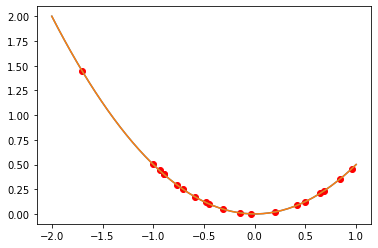

In [ ]:
nn = NeuralNetwork(learning_rate=0.025, activation_function=af)
epochs = 100

for i in range(epochs):
    nn.epoch(input_data=[x ** 2 for x in x_points], expected_output_data=y_points)

nn_x = np.linspace(a, b)
nn_y = nn.c * nn_x ** 2 + nn.d
true_x = np.linspace(a, b)
true_y = c * true_x ** 2 + d
plt.plot(true_x, true_y)
plt.plot(nn_x, nn_y)
plt.scatter(x_points, y_points, c='red')

print(f"Среднеквадратичная ошибка: {sum([e ** 2 for e in [(c * x ** 2 + d) - (nn.c * x ** 2 + nn.d) for x in x_points]])}")
print("c =", nn.c, "d =", nn.d)

***
### 3. Решение задачи регрессии через МНК. Параметр шума = 1

Среднеквадратичная ошибка: 0.12539582462337617
c = 0.4650892039570861 d = -0.02672616970829056


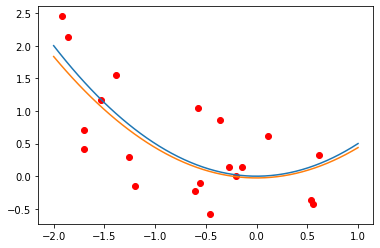

In [ ]:
A = 1

x_points = np.random.uniform(low=a, high=b, size=N)
rA = np.random.normal(scale=A, size=x_points.size)
y_points = c * x_points ** 2 + d + rA / 2
_c, _d = mnk(list(zip([x ** 2 for x in x_points], y_points)))

true_x = np.linspace(a, b)
true_y = c * true_x ** 2 + d

mnk_x = np.linspace(a, b)
mnk_y = _c * mnk_x ** 2 + _d

plt.plot(true_x, true_y)
plt.scatter(x_points, y_points, c='red')

plt.plot(mnk_x, mnk_y)

print(f"Среднеквадратичная ошибка: {sum([e ** 2 for e in [(c * x ** 2 + d) - (_c * x ** 2 + _d) for x in x_points]])}")
print("c =", _c, "d =", _d)

***
### 4. Решение задачи регрессии через обучение нейрона. Количество эпох - 100, норма обучения - 0,025. Параметр шума = 1

Среднеквадратичная ошибка: 0.3512994835206921
c = 0.4357517746892356 d = -0.0330728575703914


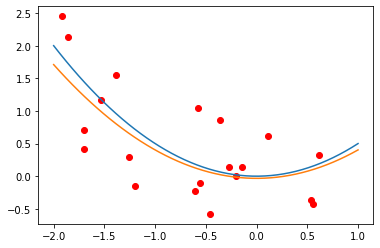

In [ ]:
A = 1
nn = NeuralNetwork(learning_rate=0.025, activation_function=af)
epochs = 100
rA = np.random.normal(scale=A, size=y_points.size)
for i in range(epochs):
    nn.epoch(input_data=[x ** 2 for x in x_points], expected_output_data=y_points + rA / 2)

nn_x = np.linspace(a, b)
nn_y = nn.c * nn_x ** 2 + nn.d 
true_x = np.linspace(a, b)
true_y = c * true_x ** 2 + d
plt.plot(true_x, true_y)
plt.plot(nn_x, nn_y)
plt.scatter(x_points, y_points, c='red')

print(f"Среднеквадратичная ошибка: {sum([e ** 2 for e in [(c * x ** 2 + d) - (nn.c * x ** 2 + nn.d) for x in x_points]])}")
print("c =", nn.c, "d =", nn.d)

***
## Выводы

В результате проведения работы было исследовано функционирование однослойной НС с правилом обучения Видроу — Хоффа в задачах регрессии экспериментальных данных. Было проведено сравнение данного метода с методом наименьших квадратов

***

## Контрольные вопросы
**1. Объясните понятие регрессии экспериментальных данных.**

Одномерная (простая) линейная регрессия – это метод, используемый для моделирования отношений между одной независимой входной переменной (переменной функции) и выходной зависимой переменной. Модель линейная.
Более общий случай – множественная линейная регрессия, где создаётся модель взаимосвязи между несколькими входными переменными и выходной зависимой переменной. Модель остаётся линейной, поскольку выходное значение представляет собой линейную комбинацию входных значений.
Также стоит упомянуть полиномиальную регрессию. Модель становится нелинейной комбинацией входных переменных, т. е. среди них могут быть экспоненциальные переменные: синус, косинус и т. п.

**2. Поясните суть метода наименьших квадратов.**

Задача заключается в нахождении коэффициентов линейной зависимости, при которых функция двух переменных $а$ и $b$ функция двух переменных
$$
F(a,b) = \sum_{i=1}^{n} (y_i - (a x_i + b))^2
$$
принимает наименьшее значение. То есть, при данных а и b сумма квадратов отклонений экспериментальных данных от найденной прямой будет наименьшей. Таким образом, решение сводится к нахождению экстремума функции двух переменных.


**3. Сформулируйте нейросетевой подход к задачам регрессии.**

МНК дает уравнение прямой, наилучшим образом аппроксимирующей набор данных. Для нахождения такой прямой можно применить другой подход, основанный на использовании НС с линейной функцией активации и обучении, т. е. настройке ее весов $с, d$ по некоторой выборке. Поскольку сеть однослойная, обучение можно реализовать по правилу Видроу — Хоффа.

Каждая эпоха обучения $k = 1,2,...$ включает в себя цикл последовательного предъявления всех образцов обучающей выборки $i=1,N$ на вход НС. Предъявление одного обучающего образца внутри эпохи является элементарным шагом обучения, во время которого вектор весовых коэффициентов $w = (c, d)$ корректируется согласно правилу Видроу — Хоффа: 
$$ \hat{c}_{i+1} = \hat{c}_i + \Delta \hat{c}_i, \Delta \hat{c}_i=\eta \sigma_i x_i, $$
$$ \hat{d}_{i+1} = \hat{d}_i + \Delta \hat{d}_i, \Delta \hat{d}_i=\eta \sigma_i, $$

где $\eta$ — норма обучения, $\eta \in (0,1]$.